In [2]:
#!pip install opentsne

## MNIST dataset

In [3]:
import numpy as np, pandas as pd

tr_df = pd.read_csv('mnist_train.csv')
tst_df = pd.read_csv('mnist_test.csv')

tr = tr_df.iloc[:, 1:].values.astype(np.float32)
tst = tst_df.iloc[:, 1:].values.astype(np.float32)

tr_labels = tr_df.iloc[:, 0].values
tst_labels = tst_df.iloc[:, 0].values

del tr_df, tst_df

# t-SNE

библиотека: [openTSNE](https://github.com/pavlin-policar/openTSNE)

## 1. Hello world usage

In [71]:
%%time
from openTSNE import TSNE

embedding = TSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration_iter=250,
    early_exaggeration=12,
    n_iter=500,
    exaggeration=4,
    initialization='pca',
    metric='cosine',
    n_jobs=8,
    verbose=True
).fit(tr)
embedding

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=4, metric='cosine', n_jobs=8,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 25.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.34 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.43 seconds
===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 5.7873, 50 iterations in 1.5430 sec
Iteration  100, KL divergence 5.5842, 50 iterations in 1.6470 sec
Iteration  150, KL divergence 5.5224, 50 iterations in 1.7080 sec
Iteration  200, KL divergence 5.4997, 50 iterations in 1.8720 sec
Iteration  250, KL divergence 5.4893, 50 iterations in 1.7720 sec
   --> Time elapsed: 8.54 seconds
===> Running optimization 

TSNEEmbedding([[ 5.47986093,  0.7199152 ],
               [11.70159166, -9.126603  ],
               [-1.48811288, 14.36167867],
               ...,
               [ 5.06452192,  1.10320523],
               [12.71079582,  1.30065781],
               [-4.13007225, -1.379103  ]])

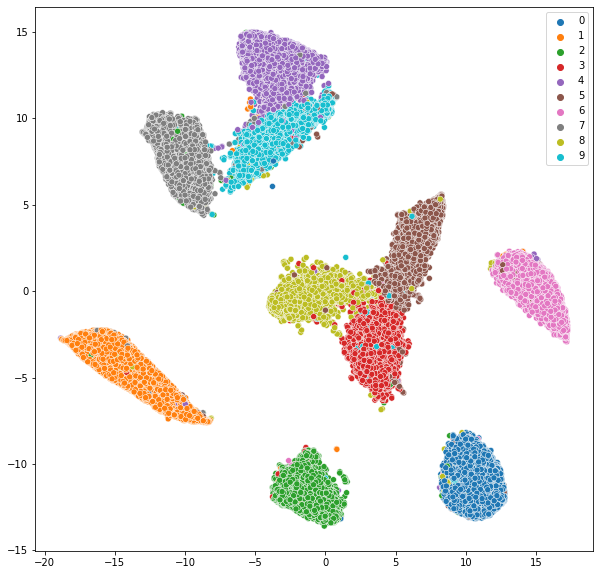

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr_labels.astype(str),
                hue_order=np.unique(tr_labels).astype(str))
plt.gcf().set_size_inches(10, 10)
plt.show()

### .transform(new_data)

In [6]:
%%time
tst_embedding = embedding.transform(tst)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.13 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 158390.5623, 50 iterations in 0.1170 sec
Iteration  100, KL divergence 158347.6815, 50 iterations in 0.1200 sec
Iteration  150, KL divergence 158316.4970, 50 iterations in 0.1170 sec
Iteration  200, KL divergence 158290.6788, 50 iterations in 0.1230 sec
Iteration  250, KL divergence 158266.9210, 50 iterations in 0.1210 sec
   --> Time elapsed: 0.60 seconds
CPU times: total: 10.6 s
Wall time: 1.77 s


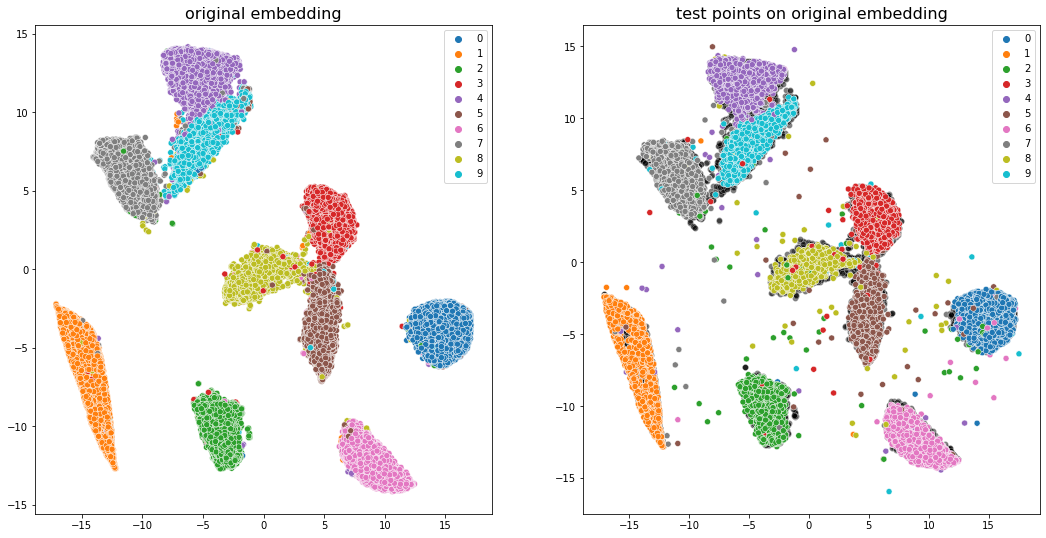

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr_labels.astype(str),
                hue_order=np.unique(tr_labels).astype(str), ax=ax[0]) # orig
ax[0].set_title('original embedding', fontsize=16)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], color='black', alpha=0.5, ax=ax[1])
sns.scatterplot(x=tst_embedding[:, 0], y=tst_embedding[:, 1], hue=tst_labels.astype(str),
                hue_order=np.unique(tst_labels).astype(str), ax=ax[1])
ax[1].set_title('test points on original embedding', fontsize=16)

plt.show()

## 1.2 Flexible usage

===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 6.9584, 50 iterations in 1.7630 sec
Iteration  100, KL divergence 6.7210, 50 iterations in 1.6630 sec
Iteration  150, KL divergence 6.6244, 50 iterations in 1.5700 sec
Iteration  200, KL divergence 6.5669, 50 iterations in 1.6220 sec
Iteration  250, KL divergence 6.5269, 50 iterations in 1.5470 sec
   --> Time elapsed: 8.16 seconds
===> Running optimization with exaggeration=3.00, lr=20000.00 for 500 iterations...
Iteration   50, KL divergence 6.2995, 50 iterations in 1.6140 sec
Iteration  100, KL divergence 6.2144, 50 iterations in 1.6050 sec
Iteration  150, KL divergence 6.1608, 50 iterations in 1.5450 sec
Iteration  200, KL divergence 6.1221, 50 iterations in 1.5598 sec
Iteration  250, KL divergence 6.0920, 50 iterations in 1.5220 sec
Iteration  300, KL divergence 6.0674, 50 iterations in 1.5330 sec
Iteration  350, KL divergence 6.0468, 50 iterations in 1.5320 sec
Iterat

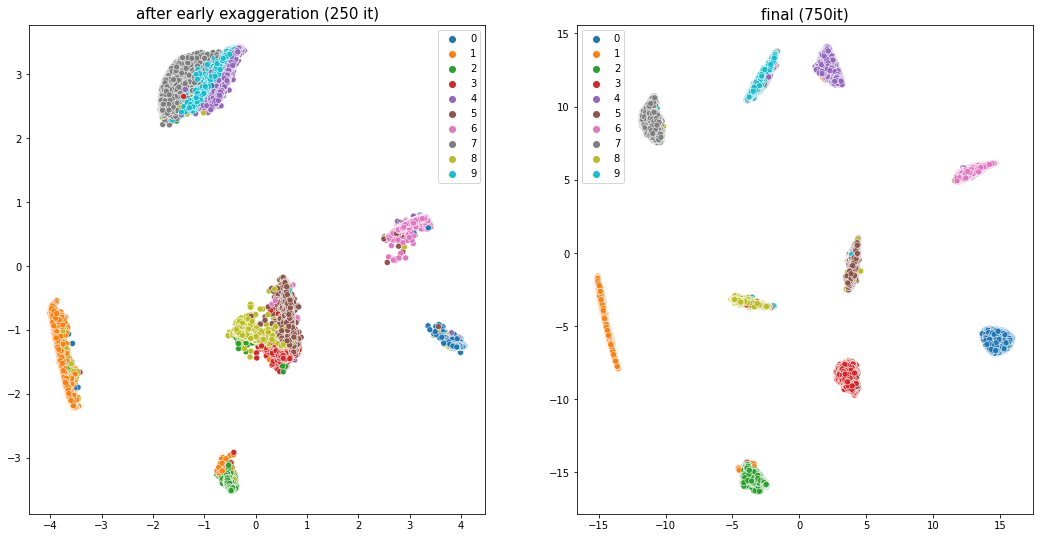

CPU times: total: 5min 22s
Wall time: 42.1 s


In [60]:
%%time
import openTSNE

init = openTSNE.initialization.pca(tr, random_state=911)
# openTSNE.initialization.rescale(init, target_std=0.0001, inplace=True) # родные можно не скейлить, там скейлинг вшит

affinities = openTSNE.affinity.PerplexityBasedNN(tr, perplexity=30, metric='cosine', method='hnsw', n_jobs=8, random_state=911)

embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    dof=0.3, # <----------
    n_jobs=8,
    verbose=True,
    optimizer=None
)


fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# EARLY EXAGGERATION
embedding = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr_labels.astype(str),
                hue_order=np.unique(tr_labels).astype(str), ax=ax[0])
ax[0].set_title('after early exaggeration (250 it)', fontsize=15)

# BASIC EXAGGERATION
embedding = embedding.optimize(n_iter=500, exaggeration=3, momentum=0.5)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr_labels.astype(str),
                hue_order=np.unique(tr_labels).astype(str), ax=ax[1])
ax[1].set_title('final (750it)', fontsize=15)

plt.show()

## 2. Применение линейных моделей на плоскости

In [68]:
%%time

from lightning.classification import SGDClassifier
from sklearn.metrics import balanced_accuracy_score

# применение SVM в оригинальном пространстве
model = SGDClassifier()
model.fit(tr, tr_labels)

predicted_labels = model.predict(tst)

balanced_accuracy_score(tst_labels, predicted_labels)

CPU times: total: 3.98 s
Wall time: 3.9 s


0.842975556687245

In [63]:
%%time

# применение SVM на плоскости
model = SGDClassifier()
model.fit(embedding, tr_labels)

embedding_tst = embedding.transform(tst)
predicted_labels = model.predict(embedding_tst)

balanced_accuracy_score(tst_labels, predicted_labels)

===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 175585.6822, 50 iterations in 0.1330 sec
Iteration  100, KL divergence 175574.8339, 50 iterations in 0.1370 sec
Iteration  150, KL divergence 175562.2988, 50 iterations in 0.1370 sec
Iteration  200, KL divergence 175548.6489, 50 iterations in 0.1430 sec
Iteration  250, KL divergence 175537.9877, 50 iterations in 0.1360 sec
   --> Time elapsed: 0.69 seconds
CPU times: total: 8.94 s
Wall time: 1.51 s


0.9554426883472807

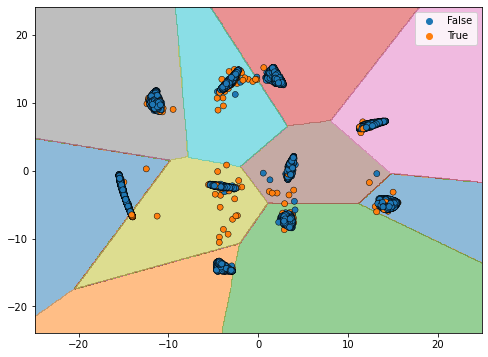

In [64]:
from my_utils import plot_classification    
    
plot_classification(model, embedding_tst[:, 0], embedding_tst[:, 1], hue=tst_labels != predicted_labels,
                   figsize=(8, 6),
                   mesh_h=0.1)

# UMAP

библиотека: [UMAP](https://github.com/lmcinnes/umap)

In [18]:
#!pip install umap-learn umap-learn[plot]

     --------------------------------------- 24.5/24.5 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 35.0 MB/s eta 0:00:00
     --------------------------------------- 18.3/18.3 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 39.2 MB/s eta 0:00:00
     ---------------------------------------- 6.8/6.8 MB 15.0 MB/s eta 0:00:00
     -------------------------------------- 56.3/56.3 KB 979.7 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 38.5 MB/s eta 0:00:00
     -------------------------------------- 113.4/113.4 KB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 33.7 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB ? eta 0:00:00
     ---------------------------------------- 82.2/82.2 KB ? eta 0:00:00
     --------------------------------------- 20.4/20.4 MB 38.5 MB/s eta 0:00:00
     ------------------------------------- 222.9/222.9 KB 1

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


## 1. Hello-world

In [69]:
%%time
import umap

mapper = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    metric='cosine',
    n_jobs=8
).fit(tr) # returns umap_object

CPU times: total: 3min 36s
Wall time: 30.6 s


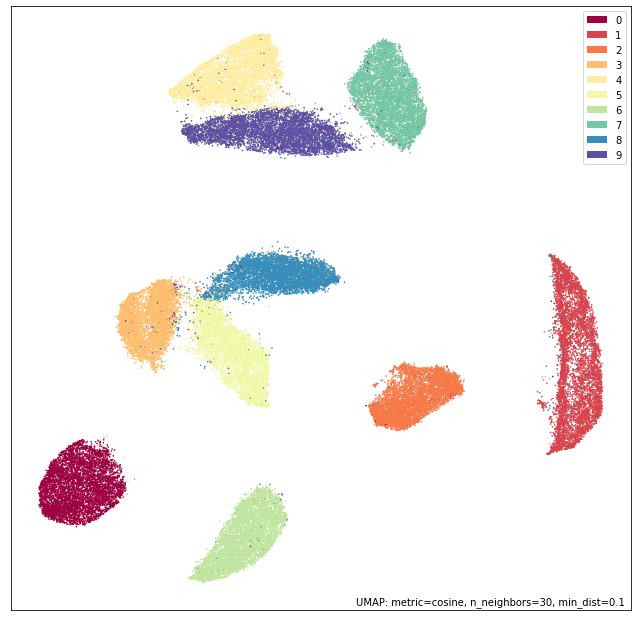

In [70]:
import umap.plot as uplot

uplot.points(mapper, labels=tr_labels)
plt.show()

CPU times: total: 14.4 s
Wall time: 5.76 s


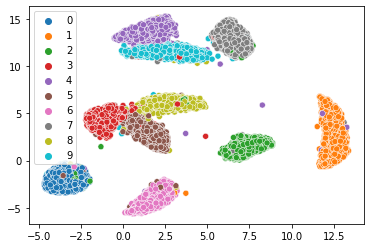

In [73]:
%time embedding_tst = mapper.transform(tst) # returns embedding

sns.scatterplot(x=embedding_tst[:, 0], y=embedding_tst[:, 1], hue=tst_labels.astype(str),
                hue_order=np.unique(tst_labels).astype(str))
plt.show()

## 2. Semi-supervised learning

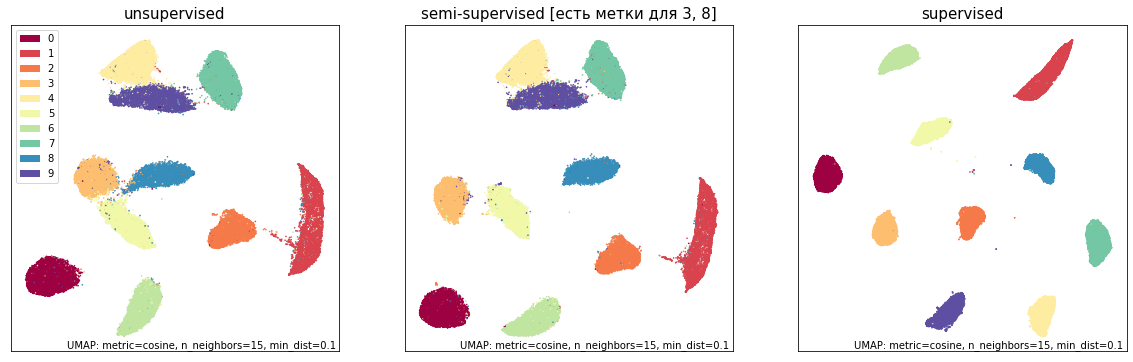

In [38]:
mapper_unsupervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=8,
).fit(tr)

semi_labels = tr_labels.copy()
semi_labels[~np.isin(semi_labels, [3, 8])] = -1
mapper_semi_supervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=8,
).fit(tr, y=semi_labels) # <-----

mapper_supervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=8,
).fit(tr, y=tr_labels) # <-----


fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].set_title('unsupervised', fontsize=15)
ax[1].set_title('semi-supervised [есть метки для 3, 8]', fontsize=15)
ax[2].set_title('supervised', fontsize=15)

uplot.points(mapper_unsupervised, labels=tr_labels, ax=ax[0])
uplot.points(mapper_semi_supervised, labels=tr_labels, ax=ax[1], show_legend=False)
uplot.points(mapper_supervised, labels=tr_labels, ax=ax[2], show_legend=False)

plt.show()

## 3. umap.plot

**`plot_interactive`**

In [44]:
umap.plot.output_notebook()

hover_data = pd.DataFrame({'digit': tr_labels, 'digit**2': tr_labels ** 2}).astype(str)
p = umap.plot.interactive(mapper, labels=tr_labels.astype(str), hover_data=hover_data, point_size=2)
umap.plot.show(p)

Loading BokehJS ...

**`plot_connectivity`**

<AxesSubplot: >

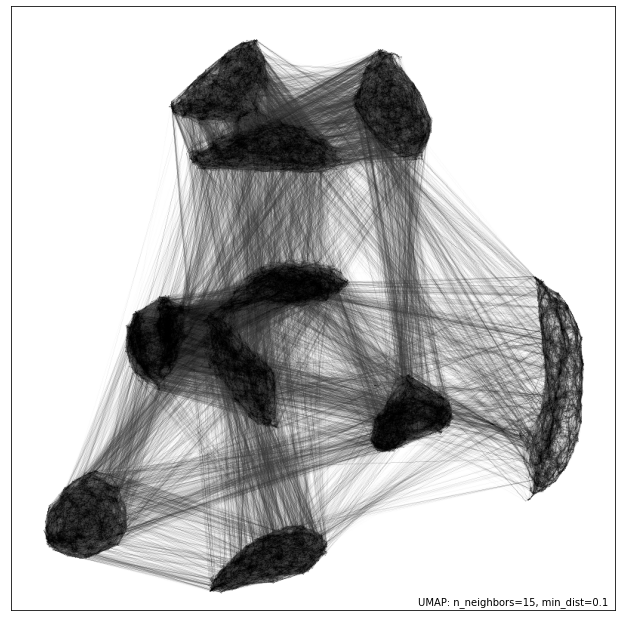

In [46]:
umap.plot.connectivity(mapper)

**`plot_diagnostic`**

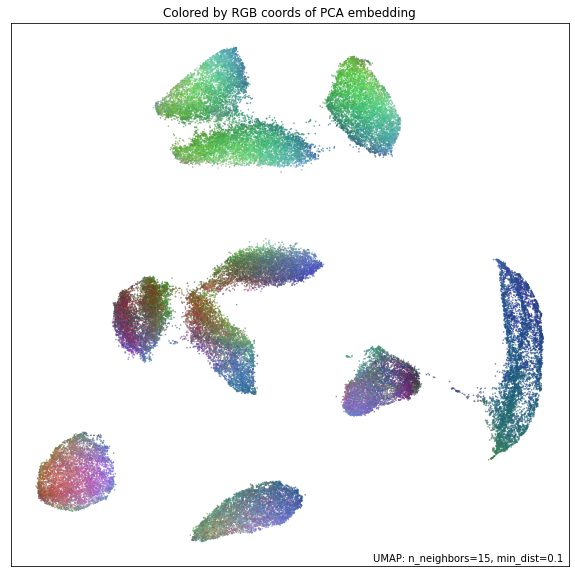

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

umap.plot.diagnostic(mapper, diagnostic_type='pca', ax=ax)
plt.show()

## 4. Остальное

Читайте в документации про:
- densMAP
- AlignedUMAP
- parametric UMAP
- inverse transforms

# Итог

- если у вас есть мера близости между объектами, вы очень сильные!
- нужно уметь пользоваться обоими методами
- нужно рисовать несколько визуализаций с разными параметрами, чтобы получить как можно больше информации
- [GPU-ускорение t-SNE и UMAP](https://github.com/rapidsai/cuml)
- [много хороших слов и интерактивное сравнение](https://pair-code.github.io/understanding-umap/)


t-SNE:
- сжатие только в 2D / 3D
- много улучшений и возможностей наплодить графиков существенно разной топологии
- почти все прозрачно и понятно как устроено

UMAP:
- математически оправданный алгоритм
- сжатие в любую размерность
- скорость (?)
- semi-supervised learning (круто!.. но не понятно)
- не все понятно как устроено и нигде не написано (нужно читать сурс код)
- классные возможности рисовалки
- неплохие фишки (см. п. 4)